In [78]:
import sys 
sys.path.insert(1, "../")
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import ast

import dask.dataframe as dd
from dask.dataframe import from_pandas

from workloads.util import use_results, use_dataset

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
experiment = "stl-yahoo-A4-keys-100-interval-10000-events-200000-queries-200000"

results_dir = use_results(experiment)
dataset_dir = use_dataset(experiment)

/data/wooders/ralf-vldb//datasets/stl-yahoo-A4-keys-100-interval-10000-events-200000-queries-200000


In [80]:
plt.rcParams["figure.figsize"] = (10,5)

results_workers_1_lifo_window_672_slide_48.csv
38.96132755279541
updates: 1456, runtime: 143.12097144126892, throughput: 10.173212110969242, expected_runtime: 140.26172494888306, runtime: 0.09633360230005704

results_workers_2_lifo_window_672_slide_48.csv
39.91190433502197
updates: 1456, runtime: 74.94475436210632, throughput: 19.42764390106781, expected_runtime: 72.25071585178374, runtime: 0.09924548880739524

results_workers_4_lifo_window_672_slide_48.csv
38.84361290931702
updates: 1352, runtime: 39.209049701690674, throughput: 34.48183545090363, expected_runtime: 36.16618198156357, runtime: 0.1070005384069928

results_workers_8_lifo_window_672_slide_48.csv
38.82719445228577
updates: 1456, runtime: 39.1004581451416, throughput: 37.23741534166433, expected_runtime: 19.70518210530281, runtime: 0.10827023134781764



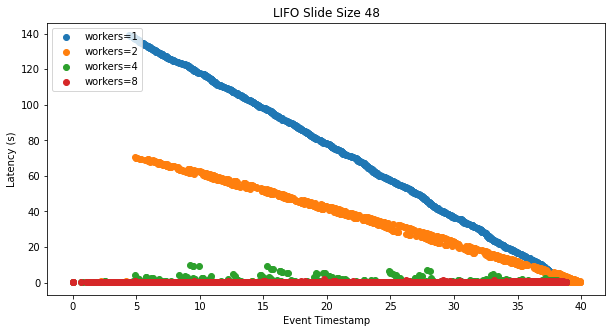

In [77]:
for workers in [1, 2, 4, 8]:
    for policy in ["lifo"]:
        for slide in [48]:
    
            result_file = f'results_workers_{workers}_{policy}_window_672_slide_{slide}.csv'
            df = pd.read_csv(f'{results_dir}/{result_file}')
            ingest_time = df.ingest_time.max() - df.ingest_time.min()
            total_time = df.processing_time.max() - df.processing_time.min()
            
            latency = df.processing_time - df.ingest_time
            start = df.ingest_time.min()
            plt.scatter(df.ingest_time - start, latency, label=f"workers={workers}")
            plt.legend(loc="upper left")
            plt.title(f"LIFO Slide Size {slide}")
            plt.ylabel("Latency (s)")
            plt.xlabel("Event Timestamp")
            
            updates = len(df.index)
            rate = updates/total_time
            runtime = df.runtime.mean()
            expected_runtime = runtime*updates/workers 

            print(result_file)
            print(ingest_time)
            print(f"updates: {updates}, runtime: {total_time}, throughput: {rate}, expected_runtime: {expected_runtime}, runtime: {runtime}")
            print()

In [74]:
result_file = f'results_workers_1_lifo_window_672_slide_48.csv'
df = pd.read_csv(f'{results_dir}/{result_file}')

df["latency"] = df["processing_time"] - df["ingest_time"]
df[df["key_id"] == 95].sort_values(by="timestamp_ms")

,key_id,trend,seasonality,timestamp_ms,processing_time,runtime,ingest_time,latency
1455,95,2838.733236,"[-528.4970922641946, -468.36205762034365, 303....",6575,1.645167e+09,0.092951,1.645167e+09,139.039720
54,95,3185.094439,"[-83.10349065831578, 221.00817908857513, 837.5...",6880,1.645167e+09,0.106088,1.645167e+09,0.221432
1299,95,2828.687669,"[-551.7039770068911, -691.2126836568954, 542.4...",7060,1.645167e+09,0.092564,1.645167e+09,119.271226
1210,95,2280.874090,"[713.9762823978792, 226.21583405163582, -49.79...",7335,1.645167e+09,0.094310,1.645167e+09,108.035983
1152,95,2686.948224,"[29.885357584756715, -152.01392777478173, -555...",7515,1.645167e+09,0.092365,1.645167e+09,100.780872
1058,95,3037.141878,"[542.6467922826797, 501.5605005354817, 353.525...",7820,1.645167e+09,0.095244,1.645167e+09,88.863593
977,95,2528.001026,"[-192.6182919040702, 656.5674212782433, 267.98...",8040,1.645167e+09,0.091954,1.645167e+09,78.929386
893,95,2751.503940,"[89.6322787632728, 399.1361157250038, -3.32230...",8340,1.645167e+09,0.090662,1.645167e+09,68.054511
832,95,2787.199604,"[34.184985063484206, -256.1924537696419, -159....",8470,1.645167e+09,0.092252,1.645167e+09,61.051481
758,95,2944.211894,"[-840.5313207798596, 143.2001088149981, 1137.9...",8750,1.645167e+09,0.093267,1.645167e+09,51.368827


results_workers_1_lifo_window_672_slide_96.csv
39.37497282028198
updates: 780, runtime: 79.5801637172699, throughput: 9.80143748850733, expected_runtime: 77.91780710220337, runtime: 0.09989462449000432

results_workers_2_lifo_window_672_slide_96.csv
39.129860162734985
updates: 728, runtime: 41.05590343475342, throughput: 17.73192011611551, expected_runtime: 37.31527626514434, runtime: 0.10251449523391302

results_workers_4_lifo_window_672_slide_96.csv
37.618866205215454
updates: 780, runtime: 37.4491868019104, throughput: 20.828222629395245, expected_runtime: 20.225320339202877, runtime: 0.10371959148309168

results_workers_8_lifo_window_672_slide_96.csv
37.24253821372986
updates: 780, runtime: 37.36662578582764, throughput: 20.874242284296308, expected_runtime: 10.579896420240402, runtime: 0.10851175815631182



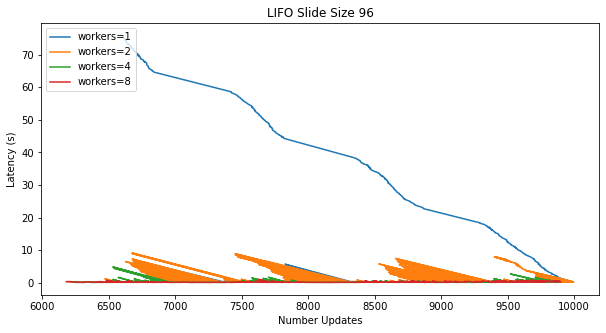

In [75]:
for workers in [1, 2, 4, 8]:
    for policy in ["lifo"]:
        for slide in [96]:
    
            result_file = f'results_workers_{workers}_{policy}_window_672_slide_{slide}.csv'
            df = pd.read_csv(f'{results_dir}/{result_file}')
            ingest_time = df.ingest_time.max() - df.ingest_time.min()
            total_time = df.processing_time.max() - df.processing_time.min()
            
            latency = df.processing_time - df.ingest_time
            plt.plot(df.timestamp_ms, latency, label=f"workers={workers}")
            plt.legend(loc="upper left")
            plt.title(f"LIFO Slide Size {slide}")
            plt.ylabel("Latency (s)")
            plt.xlabel("Number Updates")
            
            updates = len(df.index)
            rate = updates/total_time
            runtime = df.runtime.mean()
            expected_runtime = runtime*updates/workers 

            print(result_file)
            print(ingest_time)
            print(f"updates: {updates}, runtime: {total_time}, throughput: {rate}, expected_runtime: {expected_runtime}, runtime: {runtime}")
            print()

results_workers_1_lifo_window_672_slide_672.csv
10.107280731201172
updates: 182, runtime: 19.150574922561646, throughput: 9.503631130446243, expected_runtime: 18.456755638122555, runtime: 0.10141074526440964

results_workers_2_lifo_window_672_slide_672.csv
11.830399990081787
updates: 182, runtime: 11.887756824493408, throughput: 15.309869026342222, expected_runtime: 9.38338828086853, runtime: 0.10311415693262121

results_workers_4_lifo_window_672_slide_672.csv
8.250739097595215
updates: 182, runtime: 8.031449317932129, throughput: 22.66091620520365, expected_runtime: 4.85584282875061, runtime: 0.10672182041210132

results_workers_8_lifo_window_672_slide_672.csv
7.358083248138428
updates: 182, runtime: 7.198036432266235, throughput: 25.28467335677252, expected_runtime: 2.547512412071228, runtime: 0.11197856756357047



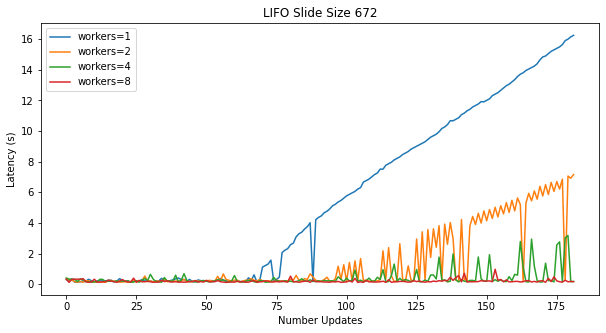

In [66]:
for workers in [1, 2, 4, 8]:
    for policy in ["lifo"]:
        for slide in [672]:
    
            result_file = f'results_workers_{workers}_{policy}_window_672_slide_{slide}.csv'
            df = pd.read_csv(f'{results_dir}/{result_file}')
            ingest_time = df.ingest_time.max() - df.ingest_time.min()
            total_time = df.processing_time.max() - df.processing_time.min()
            
            latency = df.processing_time - df.ingest_time
            plt.plot(df.index, latency, label=f"workers={workers}")
            plt.legend(loc="upper left")
            plt.title(f"LIFO Slide Size {slide}")
            plt.ylabel("Latency (s)")
            plt.xlabel("Number Updates")
            
            updates = len(df.index)
            rate = updates/total_time
            runtime = df.runtime.mean()
            expected_runtime = runtime*updates/workers 

            print(result_file)
            print(ingest_time)
            print(f"updates: {updates}, runtime: {total_time}, throughput: {rate}, expected_runtime: {expected_runtime}, runtime: {runtime}")
            print()